In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from scipy.stats import linregress
import pylab
import mplfinance as mpf
import seaborn as sn


In [104]:
web.get_data_yahoo("DOT1-USD",
start = "2020-02-01",
end = "2021-01-17")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-19,3.077784,2.692896,2.787857,2.900080,4.881987e+07,2.900080
2020-08-20,3.090093,2.730919,2.896923,2.875028,4.931314e+07,2.875028
2020-08-21,4.510613,2.816762,2.878570,4.484690,4.858011e+08,4.484690
2020-08-22,4.487058,3.716271,4.487058,3.967066,3.207495e+08,3.967066
2020-08-23,4.783158,3.812670,3.987413,4.602614,4.076902e+08,4.602614
...,...,...,...,...,...,...
2021-01-14,14.549704,10.925012,10.947876,14.539050,5.405055e+09,14.539050
2021-01-15,14.855377,11.851579,14.522520,13.212381,6.159631e+09,13.212381
2021-01-16,19.322062,13.185755,13.198050,18.180424,8.917082e+09,18.180424


In [105]:
tickers = ["BTC-USD", "ETH-USD", "DOT1-USD", "KSM-USD", "ADA-USD", "LTC-USD"]
multpl_crypto = web.get_data_yahoo(tickers,
start = "2021-01-01",
end = "2021-01-21")

In [106]:
multpl_crypto

Attributes     Adj Close                                                \
Symbols          BTC-USD      ETH-USD   DOT1-USD     KSM-USD   ADA-USD   
Date                                                                     
2021-01-01  29374.152344   730.367554   8.306819   69.499802  0.175350   
2021-01-02  32127.267578   774.534973   9.208837   68.944092  0.177423   
2021-01-03  32782.023438   975.507690  10.033282   72.572510  0.204995   
2021-01-04  31971.914062  1040.233032   9.469611   68.261093  0.224762   
2021-01-05  33992.429688  1100.006104   9.701655   67.807350  0.258314   
2021-01-06  36824.363281  1207.112183  10.096068   75.114632  0.331898   
2021-01-07  39371.042969  1225.678101   9.644586   68.888191  0.299980   
2021-01-08  40797.609375  1224.197144   9.307136   68.889412  0.305597   
2021-01-09  40254.546875  1281.077271   9.777765   69.117271  0.332973   
2021-01-10  38356.441406  1262.246704   9.305048   71.271484  0.304895   
2021-01-11  35566.656250  1090.145386   8.276440   64.516289  0.275466   
2021-01-12  33922.960938  1043.434570   8.264148   62.495152  0.287003   
2021-01-13  37316.359375  1130.739380  10.957710   76.800140  0.313609   
2021-01-14  39187.328125  1218.453003  14.539050   88.013840  0.310396   
2021-01-15  36825.367188  1171.834595  13.212381   83.522697  0.302530   
2021-01-16  36178.140625  1233.537598  18.180424  103.246452  0.352444   
2021-01-17  35791.277344  1230.172241  16.984255  102.568123  0.379852   
2021-01-18  36630.074219  1257.279541  16.512928  109.287666  0.371428   
2021-01-19  36069.804688  1377.295898  16.468510  101.915840  0.369137   
2021-01-20  35547.750000  1382.274048        NaN  106.073524  0.375394   
2021-01-21  30825.699219  1121.570923        NaN   93.144112  0.310209   
2021-01-22  30841.281250  1153.161621        NaN   94.159683  0.316940   

Attributes                     Close                                      ...  \
Symbols        LTC-USD       BTC-USD      ETH-USD   DOT1-USD     KSM-USD  ...   
Date                                                                      ...   
2021-01-01  126.230347  29374.152344   730.367554   8.306819   69.499802  ...   
2021-01-02  136.944885  32127.267578   774.534973   9.208837   68.944092  ...   
2021-01-03  160.190582  32782.023438   975.507690  10.033282   72.572510  ...   
2021-01-04  154.807327  31971.914062  1040.233032   9.469611   68.261093  ...   
2021-01-05  158.594772  33992.429688  1100.006104   9.701655   67.807350  ...   
2021-01-06  169.016922  36824.363281  1207.112183  10.096068   75.114632  ...   
2021-01-07  169.615952  39371.042969  1225.678101   9.644586   68.888191  ...   
2021-01-08  173.279877  40797.609375  1224.197144   9.307136   68.889412  ...   
2021-01-09  177.483932  40254.546875  1281.077271   9.777765   69.117271  ...   
2021-01-10  171.114838  38356.441406  1262.246704   9.305048   71.271484  ...   
2021-01-11  139.252228  35566.656250  1090.145386   8.276440   64.516289  ...   
2021-01-12  132.635910  33922.960938  1043.434570   8.264148   62.495152  ...   
2021-01-13  147.421341  37316.359375  1130.739380  10.957710   76.800140  ...   
2021-01-14  152.084579  39187.328125  1218.453003  14.539050   88.013840  ...   
2021-01-15  144.237549  36825.367188  1171.834595  13.212381   83.522697  ...   
2021-01-16  144.265427  36178.140625  1233.537598  18.180424  103.246452  ...   
2021-01-17  142.430817  35791.277344  1230.172241  16.984255  102.568123  ...   
2021-01-18  152.144089  36630.074219  1257.279541  16.512928  109.287666  ...   
2021-01-19  153.487427  36069.804688  1377.295898  16.468510  101.915840  ...   
2021-01-20  149.931427  35547.750000  1382.274048        NaN  106.073524  ...   
2021-01-21  130.133499  30825.699219  1121.570923        NaN   93.144112  ...   
2021-01-22  133.836792  30841.281250  1153.161621        NaN   94.159683  ...   

Attributes       Open                                          Volume  \
Symbols      DOT1-USD     KSM-USD   ADA-USD     LT

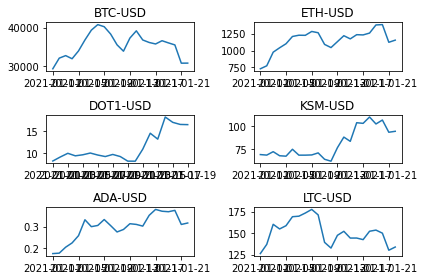

In [107]:
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

ax1.plot(multpl_crypto['Adj Close']['BTC-USD'])
ax1.set_title("BTC-USD")
ax2.plot(multpl_crypto['Adj Close']['ETH-USD'])
ax2.set_title("ETH-USD")
ax3.plot(multpl_crypto['Adj Close']['DOT1-USD'])
ax3.set_title("DOT1-USD")
ax4.plot(multpl_crypto['Adj Close']['KSM-USD'])
ax4.set_title("KSM-USD")
ax5.plot(multpl_crypto['Adj Close']['ADA-USD'])
ax5.set_title("ADA-USD")
ax6.plot(multpl_crypto['Adj Close']['LTC-USD'])
ax6.set_title("LTC-USD")

plt.tight_layout()
plt.show()

In [108]:
multpl_stock_daily_returns = multpl_crypto['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_crypto['Adj Close'].resample('M').ffill().pct_change()

<Figure size 432x288 with 0 Axes>

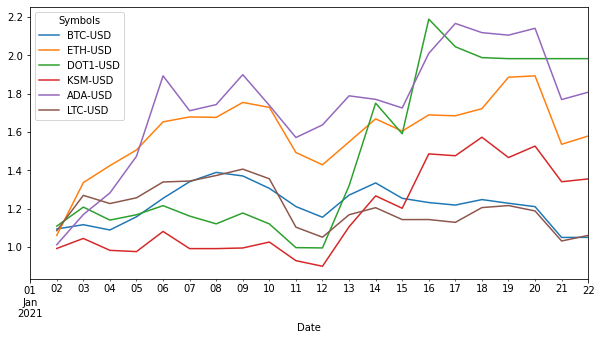

In [109]:
fig = plt.figure()
(multpl_stock_daily_returns + 1).cumprod().plot(figsize=(10,5))
plt.show()

In [70]:
mean_df = pd.DataFrame(multpl_stock_daily_returns.mean())
mean_df

,0
Symbols,
BTC-USD,0.002414
ETH-USD,0.023823
DOT1-USD,0.042944
KSM-USD,0.016165
ADA-USD,0.031043
LTC-USD,0.002894


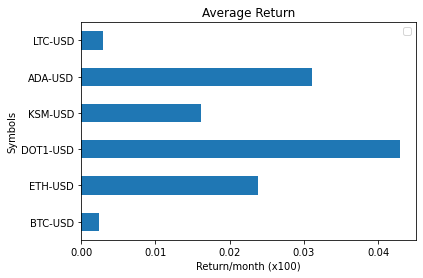

In [71]:
mean_df.plot.barh()
plt.title('Average Return')
plt.xlabel('Return/month (x100)')
plt.legend('')

In [72]:
Std_df = pd.DataFrame(multpl_stock_daily_returns.std())
Std_df

,0
Symbols,
BTC-USD,0.065953
ETH-USD,0.096668
DOT1-USD,0.140777
KSM-USD,0.104113
ADA-USD,0.115598
LTC-USD,0.082794


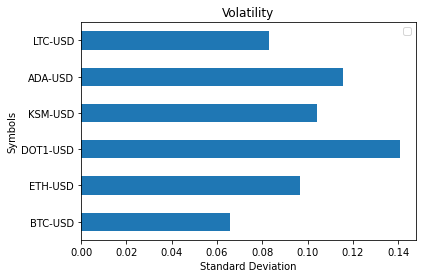

In [73]:
Std_df.plot.barh()
plt.title('Volatility')
plt.xlabel('Standard Deviation')
plt.legend('')

In [74]:
corr_df = (multpl_stock_daily_returns.corr())
corr_df

Symbols,BTC-USD,ETH-USD,DOT1-USD,KSM-USD,ADA-USD,LTC-USD
Symbols,,,,,,
BTC-USD,1.000000,0.690540,0.394447,0.554936,0.563559,0.800689
ETH-USD,0.690540,1.000000,0.401257,0.549774,0.722492,0.894047
DOT1-USD,0.394447,0.401257,1.000000,0.807890,0.349124,0.452289
KSM-USD,0.554936,0.549774,0.807890,1.000000,0.602483,0.609836
ADA-USD,0.563559,0.722492,0.349124,0.602483,1.000000,0.626676
LTC-USD,0.800689,0.894047,0.452289,0.609836,0.626676,1.000000


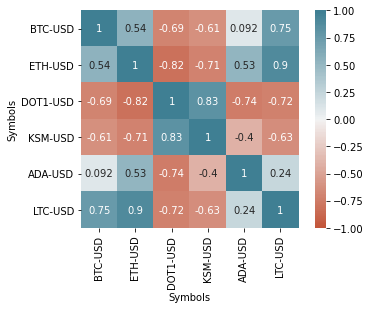

In [75]:
corrMatrix = corr_df.corr()
sn.heatmap(corrMatrix, 
           annot=True,
           vmin=-1, vmax=1, center=0,
           cmap=sn.diverging_palette(20, 220, n=200),
           square=True
          )
plt.show()

In [36]:
tickers = ["ADA-USD", "ETH-USD", "DOT1-USD"]
multpl_stocks_top_3 = web.get_data_yahoo(tickers,
start = "2020-12-01",
end = "2021-01-21")

In [37]:
multpl_stock_daily_returns2 = multpl_stocks_top_3['Adj Close'].pct_change()
multpl_stock_monthly_returns2 = multpl_stocks_top_3['Adj Close'].resample('M').ffill().pct_change()

<Figure size 432x288 with 0 Axes>

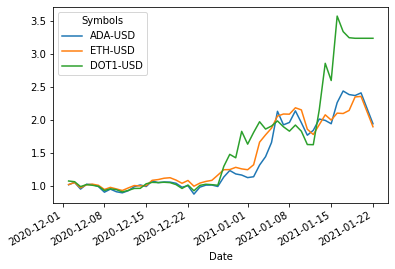

In [38]:
fig = plt.figure()
(multpl_stock_daily_returns2 + 1).cumprod().plot()

plt.show()

In [39]:
tickers = ["KSM-USD"]
DOT1_stock = web.get_data_yahoo(tickers,
start = "2020-09-01",
end = "2021-01-17")

In [40]:
multpl_stock_daily_returns2 = DOT1_stock['Adj Close']
multpl_stock_monthly_returns2 = DOT1_stock['Adj Close'].resample('M').ffill()

clean_DOT1 = multpl_stock_monthly_returns2.dropna()
print(clean_DOT1)
#multpl_stock_monthly_returns2

Symbols        KSM-USD
Date                  
2020-08-31   41.382156
2020-09-30   34.050755
2020-10-31   30.436148
2020-11-30   52.118801
2020-12-31   71.959625
2021-01-31  109.287666


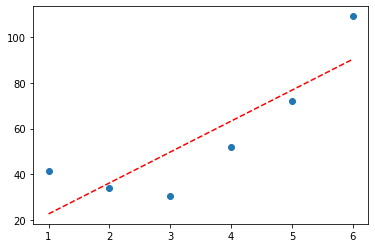

In [41]:

x = [i for i in np.arange(1,7,1)]
y = clean_DOT1['KSM-USD']

fig = plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()


In [42]:
multpl_stock_daily_returns2 = DOT1_stock['Adj Close']
multpl_stock_monthly_returns2 = DOT1_stock['Adj Close'].resample('M').ffill()

DOT1_stock2 = multpl_stock_daily_returns2.dropna()
DOT1_stock2

Symbols,KSM-USD
Date,
2020-08-31,41.382156
2020-09-01,57.690388
2020-09-02,44.930496
2020-09-03,42.449684
2020-09-25,35.929001
...,...
2021-01-14,88.013840
2021-01-15,83.522697
2021-01-16,103.246452


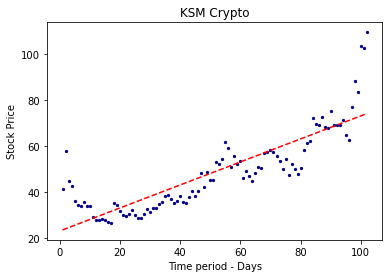

In [43]:
x = [i for i in np.arange(1,103,1)]
y = DOT1_stock2['KSM-USD']

fig = plt.scatter(x, y, c='darkblue', s=5)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel('Time period - Days')
plt.ylabel('Stock Price')
plt.title('KSM Crypto')

plt.show()

In [44]:
tickers = ["ETH-USD"]
ETH_stock = web.get_data_yahoo(tickers,
start = "2020-09-01",
end = "2021-01-17")

In [45]:
multpl_stock_daily_returns2 = ETH_stock['Adj Close']
multpl_stock_monthly_returns2 = ETH_stock['Adj Close'].resample('M').ffill()

clean_ETH = multpl_stock_daily_returns2.dropna()
clean_ETH

Symbols,ETH-USD
Date,
2020-08-31,477.051910
2020-09-01,440.040497
2020-09-02,385.671936
2020-09-03,388.241150
2020-09-04,335.260071
...,...
2021-01-14,1218.453003
2021-01-15,1171.834595
2021-01-16,1233.537598


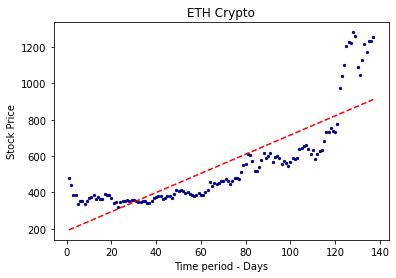

In [47]:
x = [i for i in np.arange(1,138,1)]
y = clean_ETH['ETH-USD']

fig = plt.scatter(x, y, c='darkblue', s=5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Time period - Days')
plt.ylabel('Stock Price')
plt.title('ETH Crypto')

plt.show()

In [48]:
tickers = ["ADA-USD"]
ADA_stock = web.get_data_yahoo(tickers,
start = "2020-09-01",
end = "2021-01-17")

In [49]:
multpl_stock_daily_returns2 = ADA_stock['Adj Close']
multpl_stock_monthly_returns2 = ADA_stock['Adj Close']

clean_ADA = multpl_stock_daily_returns2.dropna()
clean_ADA

Symbols,ADA-USD
Date,
2020-08-31,0.125411
2020-09-01,0.115613
2020-09-02,0.096154
2020-09-03,0.102445
2020-09-04,0.089923
...,...
2021-01-14,0.310396
2021-01-15,0.302530
2021-01-16,0.352444


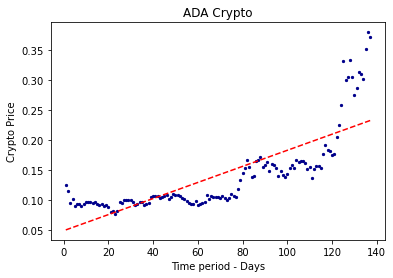

In [51]:
x = [i for i in np.arange(1,138,1)]
y = clean_ADA['ADA-USD']

fig = plt.scatter(x, y, c='darkblue', s=5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Time period - Days')
plt.ylabel('Crypto Price')
plt.title('ADA Crypto')

plt.show()

In [52]:
tickers = ["BTC-USD"]
BTC_stock = web.get_data_yahoo(tickers,
start = "2020-09-01",
end = "2021-01-17")

In [53]:
multpl_stock_daily_returns2 = BTC_stock['Adj Close']
multpl_stock_monthly_returns2 = BTC_stock['Adj Close']

clean_BTC = multpl_stock_daily_returns2.dropna()
clean_BTC

Symbols,BTC-USD
Date,
2020-08-31,11970.478516
2020-09-01,11414.034180
2020-09-02,10245.296875
2020-09-03,10511.813477
2020-09-04,10169.567383
...,...
2021-01-14,39187.328125
2021-01-15,36825.367188
2021-01-16,36178.140625


ValueError: x and y must be the same size

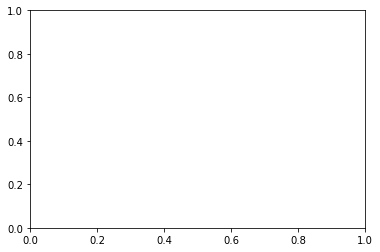

In [54]:
x = [i for i in np.arange(1,137,1)]
y = clean_BTC['BTC-USD']

fig = plt.scatter(x, y, c='darkblue', s=5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Time period - Days')
plt.ylabel('Stock Price')
plt.title('BTC Crypto')

plt.show()

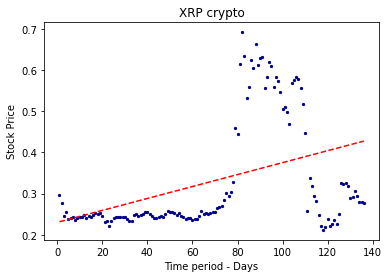

In [31]:
tickers = ["XRP-USD"]
XRP_stock = web.get_data_yahoo(tickers,
start = "2020-09-01",
end = "2021-01-17")

multpl_stock_daily_returns2 = XRP_stock['Adj Close']
multpl_stock_monthly_returns2 = XRP_stock['Adj Close']

clean_XRP = multpl_stock_daily_returns2.dropna()
clean_XRP

x = [i for i in np.arange(1,137,1)]
y = clean_XRP['XRP-USD']

fig = plt.scatter(x, y, c='darkblue', s=5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Time period - Days')
plt.ylabel('Stock Price')
plt.title('XRP crypto')

plt.show()

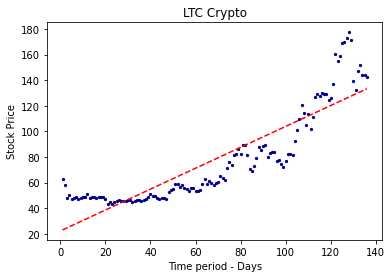

In [32]:
tickers = ["LTC-USD"]
LTC_stock = web.get_data_yahoo(tickers,
start = "2020-09-01",
end = "2021-01-17")

multpl_stock_daily_returns2 = LTC_stock['Adj Close']
multpl_stock_monthly_returns2 = LTC_stock['Adj Close']

clean_LTC = multpl_stock_daily_returns2.dropna()
clean_LTC

x = [i for i in np.arange(1,137,1)]
y = clean_LTC['LTC-USD']

fig = plt.scatter(x, y, c='darkblue', s=5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Time period - Days')
plt.ylabel('Stock Price')
plt.title('LTC Crypto')

plt.show()

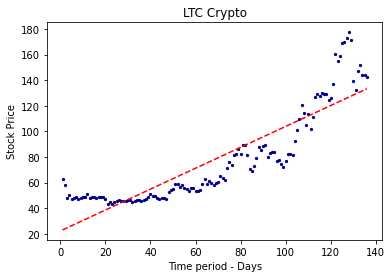

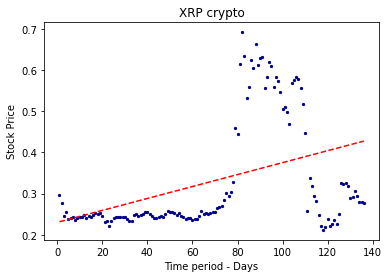

In [33]:
tickers = ["LTC-USD"]
LTC_stock = web.get_data_yahoo(tickers,
start = "2020-09-01",
end = "2021-01-17")

multpl_stock_daily_returns2 = LTC_stock['Adj Close']
multpl_stock_monthly_returns2 = LTC_stock['Adj Close']

clean_LTC = multpl_stock_daily_returns2.dropna()
clean_LTC

x = [i for i in np.arange(1,137,1)]
y = clean_LTC['LTC-USD']

fig = plt.scatter(x, y, c='darkblue', s=5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Time period - Days')
plt.ylabel('Stock Price')
plt.title('LTC Crypto')

plt.show()
tickers = ["XRP-USD"]
XRP_stock = web.get_data_yahoo(tickers,
start = "2020-09-01",
end = "2021-01-17")

multpl_stock_daily_returns2 = XRP_stock['Adj Close']
multpl_stock_monthly_returns2 = XRP_stock['Adj Close']

clean_XRP = multpl_stock_daily_returns2.dropna()
clean_XRP

x = [i for i in np.arange(1,137,1)]
y = clean_XRP['XRP-USD']

fig = plt.scatter(x, y, c='darkblue', s=5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Time period - Days')
plt.ylabel('Stock Price')
plt.title('XRP crypto')

plt.show()
